<a href="https://colab.research.google.com/github/AnasMahfudz/DataScienceProject/blob/main/Predict%20Churning%20Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card customers**

**Predict Churning customers**

Problem :

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers decisions in the opposite direction. We have only 16.07% of customers who have churned. Thus, it's a bit difficult to train our model to predict churning customers.

In [2]:
# import library
import pandas as pd
import numpy as np

#matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/Valdera/Project-DigitalSkola/main/BankChurners.csv')
data = pd.DataFrame(data)
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# 1. Understanding the Data

> Based on the note from the data source, I decided to ignore the last 2 columns of the data, so the first thing I did was I had to delete it so it wouldn't interfere when analyzing the overall data

In [4]:
#Deleting the last 2 columns
data.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                   'CLIENTNUM'], 
          inplace=True, axis=1)
data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [5]:
data.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

> Grouping columns by data type

In [6]:
numerical_columns = ["Customer_Age", 
                     "Months_on_book", 
                     "Credit_Limit", 
                     "Total_Revolving_Bal", 
                     "Avg_Open_To_Buy", 
                     "Total_Amt_Chng_Q4_Q1", 
                     "Total_Trans_Amt", 
                     "Total_Trans_Ct", 
                     "Total_Ct_Chng_Q4_Q1", 
                     "Avg_Utilization_Ratio"]

categorical_columns = ['Attrition_Flag',
                       'Gender',
                       'Education_Level',
                       'Marital_Status',
                       'Income_Category',
                       'Card_Category']

discrete_columns = ['CLIENTNUM',
                    'Dependent_count',
                    'Total_Relationship_Count',
                    'Months_Inactive_12_mon',
                    'Contacts_Count_12_mon']

# **2. Identify the Data**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [8]:
print(data.duplicated().sum())
print(data.isnull().sum())

0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


Because there are no null values and duplicated values found, it can be said that this data is clean, and can be continued for data analysis by looking at the distribution of the data.

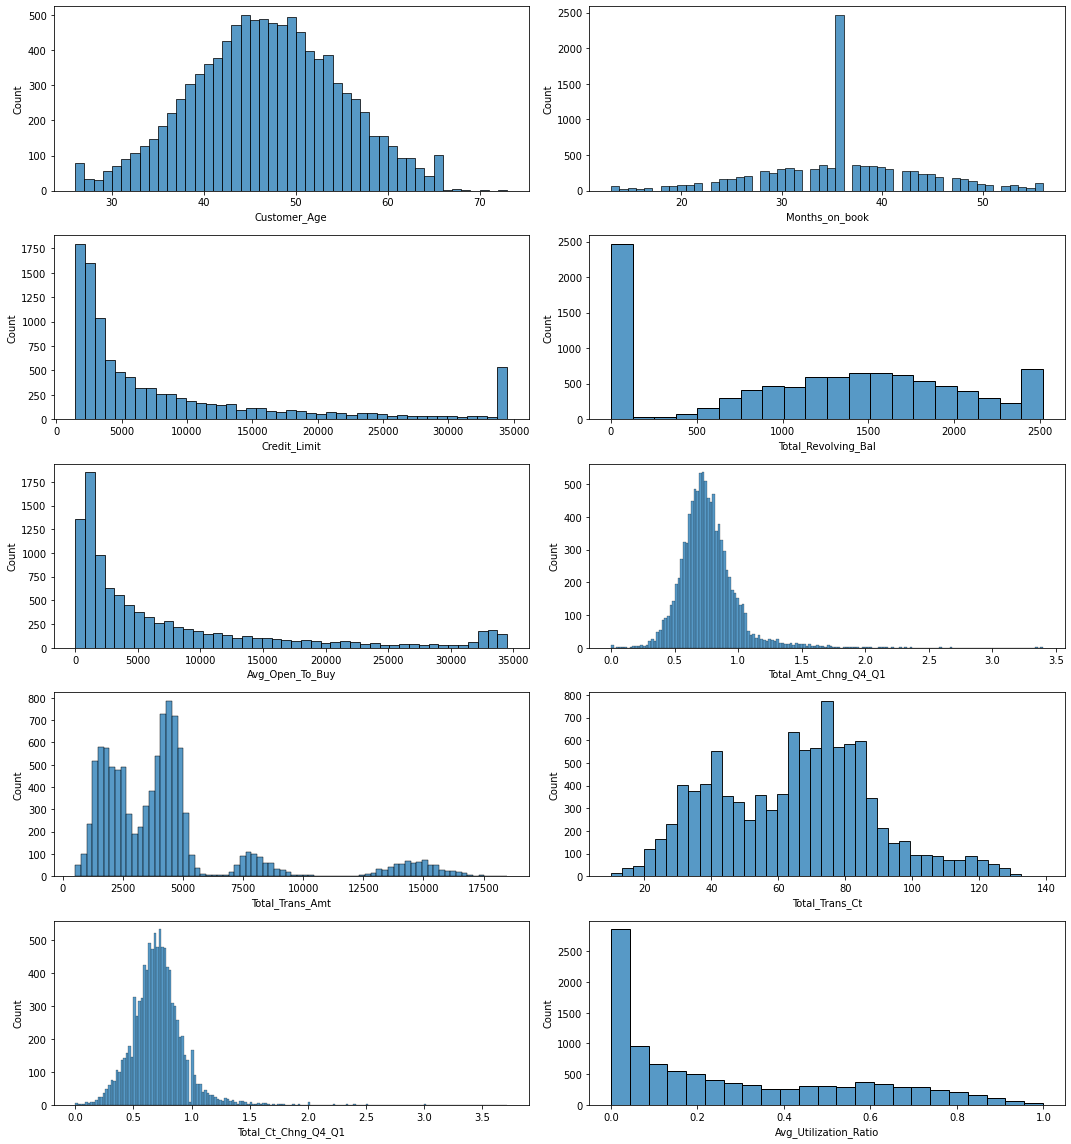

In [9]:
# Numerical Value 
fig, axes = plt.subplots(5,2, figsize=(15,16))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(numerical_columns):
  plot = sns.histplot(data=data, x=col, ax=axes[i], fill=True)
plt.tight_layout()

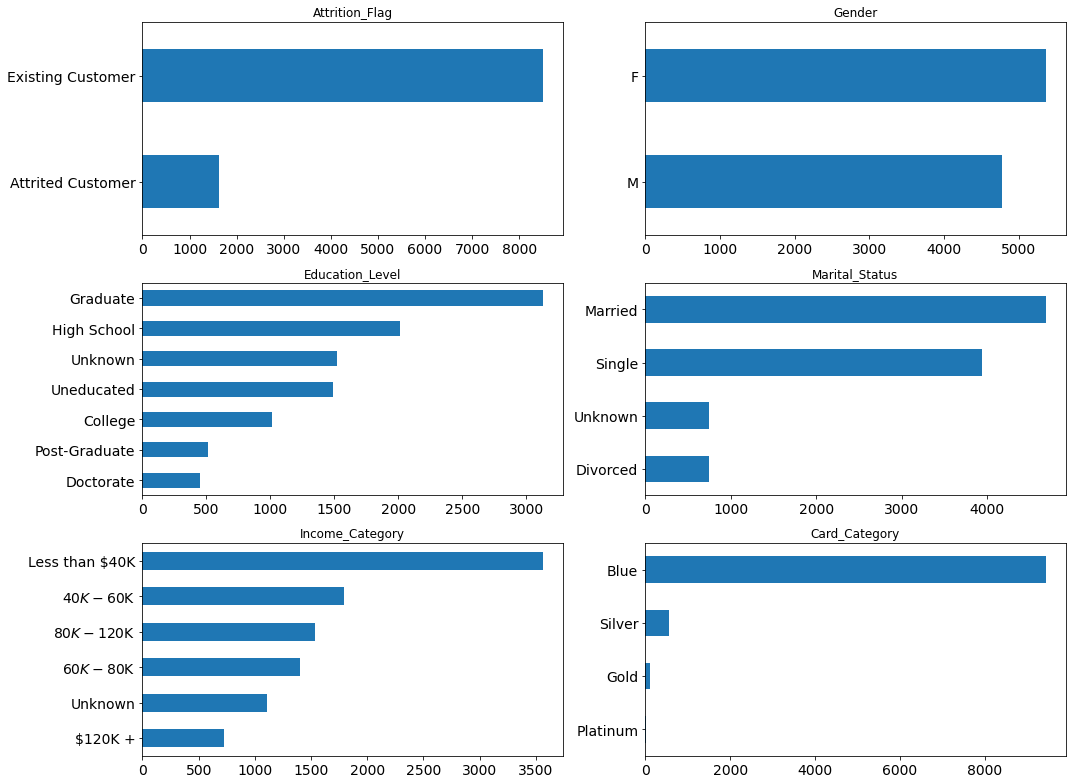

In [10]:
# Categorical Value
fig, axes = plt.subplots(3,2, figsize=(15,11))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(categorical_columns):
  data[col].value_counts()[::-1].plot(kind='barh',ax=axes[i], title=col, fontsize=14)
  axes[i].set_ylabel('')
plt.tight_layout()

# **3. Analyze the Data**

> **Analyze the data better focus on attrition_Flag column to dig more information about churning customers**

> The first analysis is to look for outliers values, because these values must be determined to see the pattern of distribution so that we can study the data better.

> To find outliers, it is necessary to pay attention to using a boxplot chart

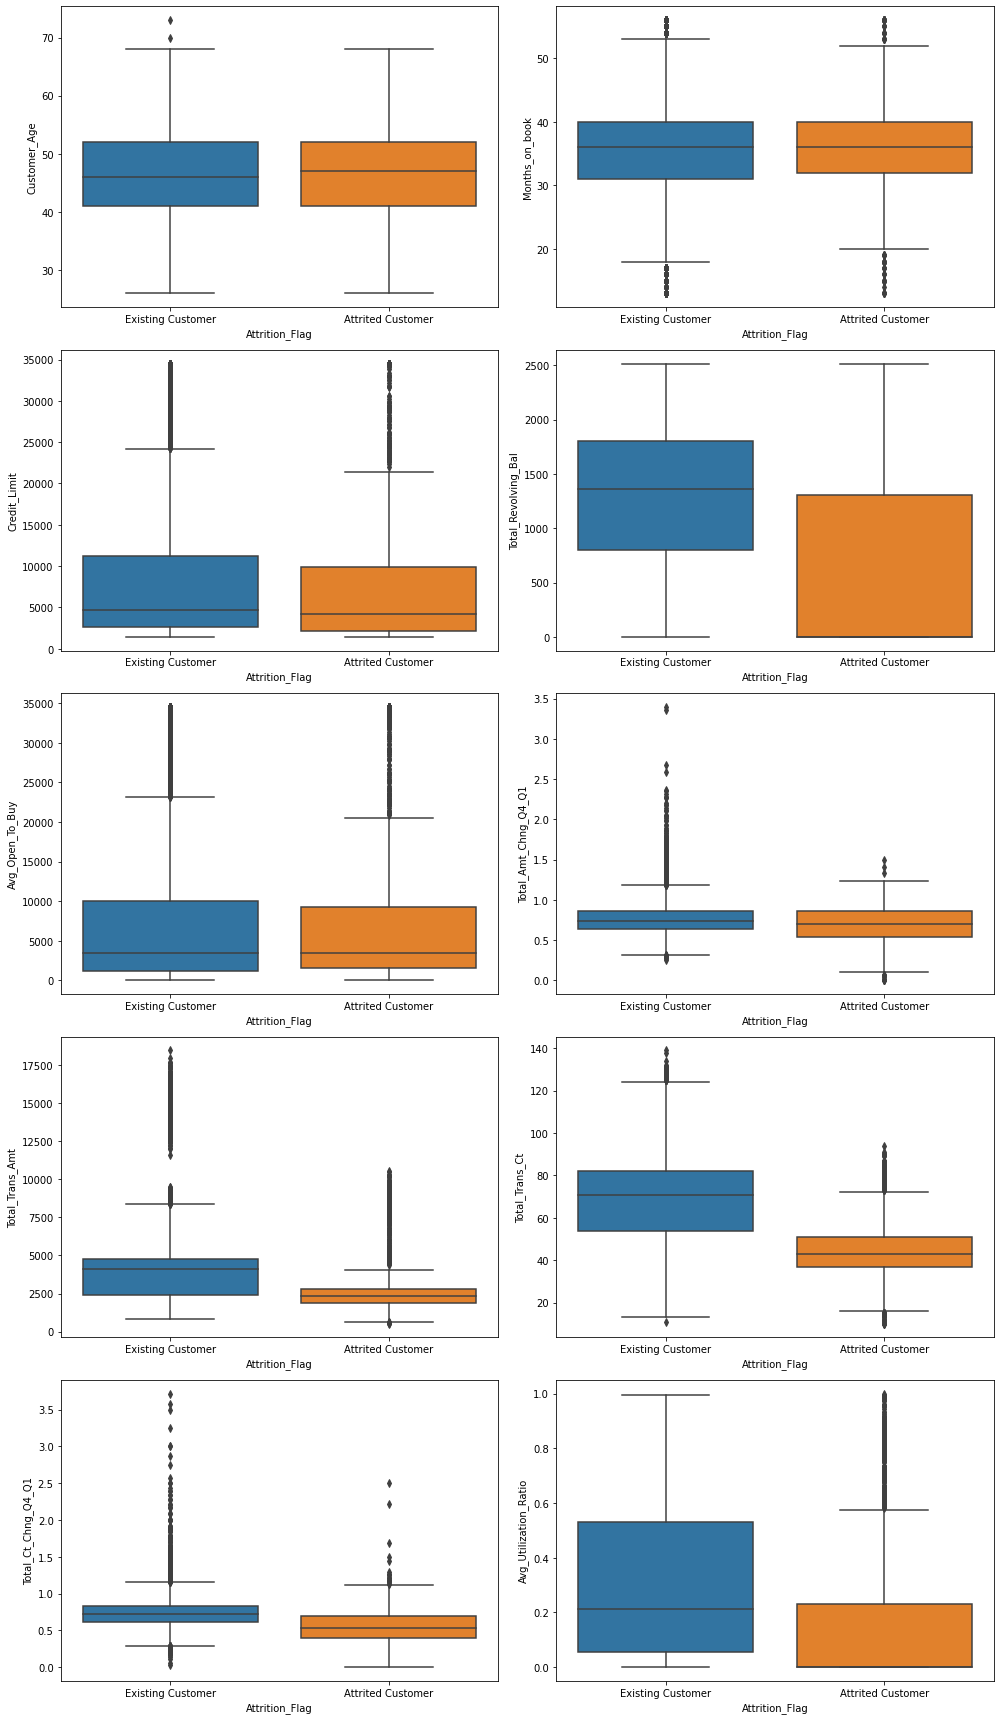

In [11]:
fig, axes = plt.subplots(5,2, figsize=(14,24))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(numerical_columns):
    plot = sns.boxplot(data=data, y=col, x='Attrition_Flag', ax=axes[i])
plt.tight_layout()

# **4. Data Pre-Processing**

# Label Eencoding for Target Value

> Then the analysis continues by seeing how the level of correlation between all columns, but the first do Label Encoder to change "Existing Customer" = 1, and "Attrited Customer" = 0

In [12]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

data['Attrition_Flag'] = label.fit_transform(data['Attrition_Flag'])
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


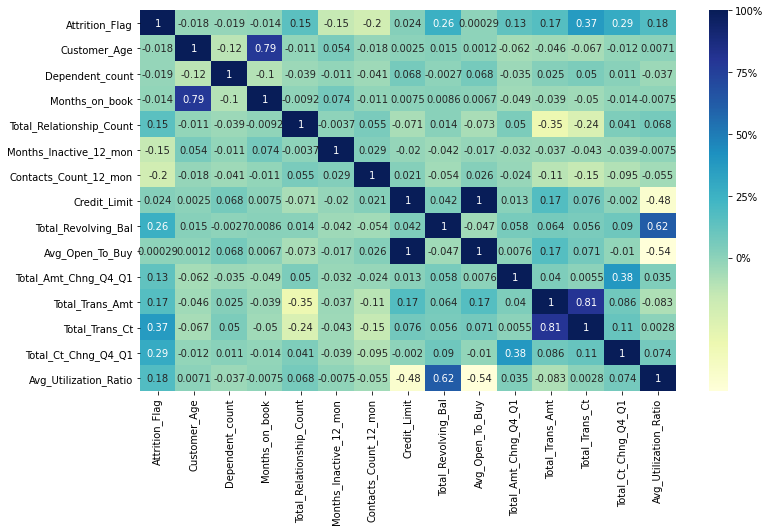

In [13]:
plt.figure(figsize=(12,7))
ax = sns.heatmap(data.corr(), annot=True,cmap="YlGnBu")
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, .25, .50, .75, 1])
cbar.set_ticklabels(['0%', '25%','50%', '75%', '100%'])
plt.show()

# One Hot Encoding for Categorical Value

Now we can know what column that has good corelation with "attrition flag" column

In [14]:
#performing one-hot encoding
print('Before doing one-hot encoding',data.shape)
data_dumm = pd.get_dummies(data, prefix_sep='_')
print('After doing one-hot encoding',data_dumm.shape)
data_dumm.head()

Before doing one-hot encoding (10127, 20)
After doing one-hot encoding (10127, 38)


,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,1,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
1,1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
2,1,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,1,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
4,1,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


# Removing Ouliers (STD Method)

In [15]:
# Before Removing Outliers
data_dumm['Attrition_Flag'].value_counts()

1    8500
0    1627
Name: Attrition_Flag, dtype: int64

In [16]:
#Removing Outliers Function (Standard Deviation Method)
def remove_outliers(data_dumm, columns, tresh=3):
    dataset = data_dumm.copy()
    index_to_remove = []
    value_to_remove = []
    for col in columns:
        array_to_remove = dataset[col].values
        mean, std = np.mean(array_to_remove), np.std(array_to_remove)
        z_score = np.abs((array_to_remove - mean) / std)
        threshold = tresh
        good = z_score < threshold
        for i in range(len(good)):
            if good[i] == False:
                index_to_remove.append(i)
                value_to_remove.append(array_to_remove[i])
    index_to_remove = np.unique(np.array(index_to_remove))
    print("Removed rows: ", len(index_to_remove))
    dataset = dataset.drop(dataset.index[index_to_remove])
    return dataset

In [17]:
data_after_removing_outliers = remove_outliers(data_dumm, numerical_columns)

Removed rows:  642


In [18]:
data_after_removing_outliers['Attrition_Flag'].value_counts()

1    7876
0    1609
Name: Attrition_Flag, dtype: int64

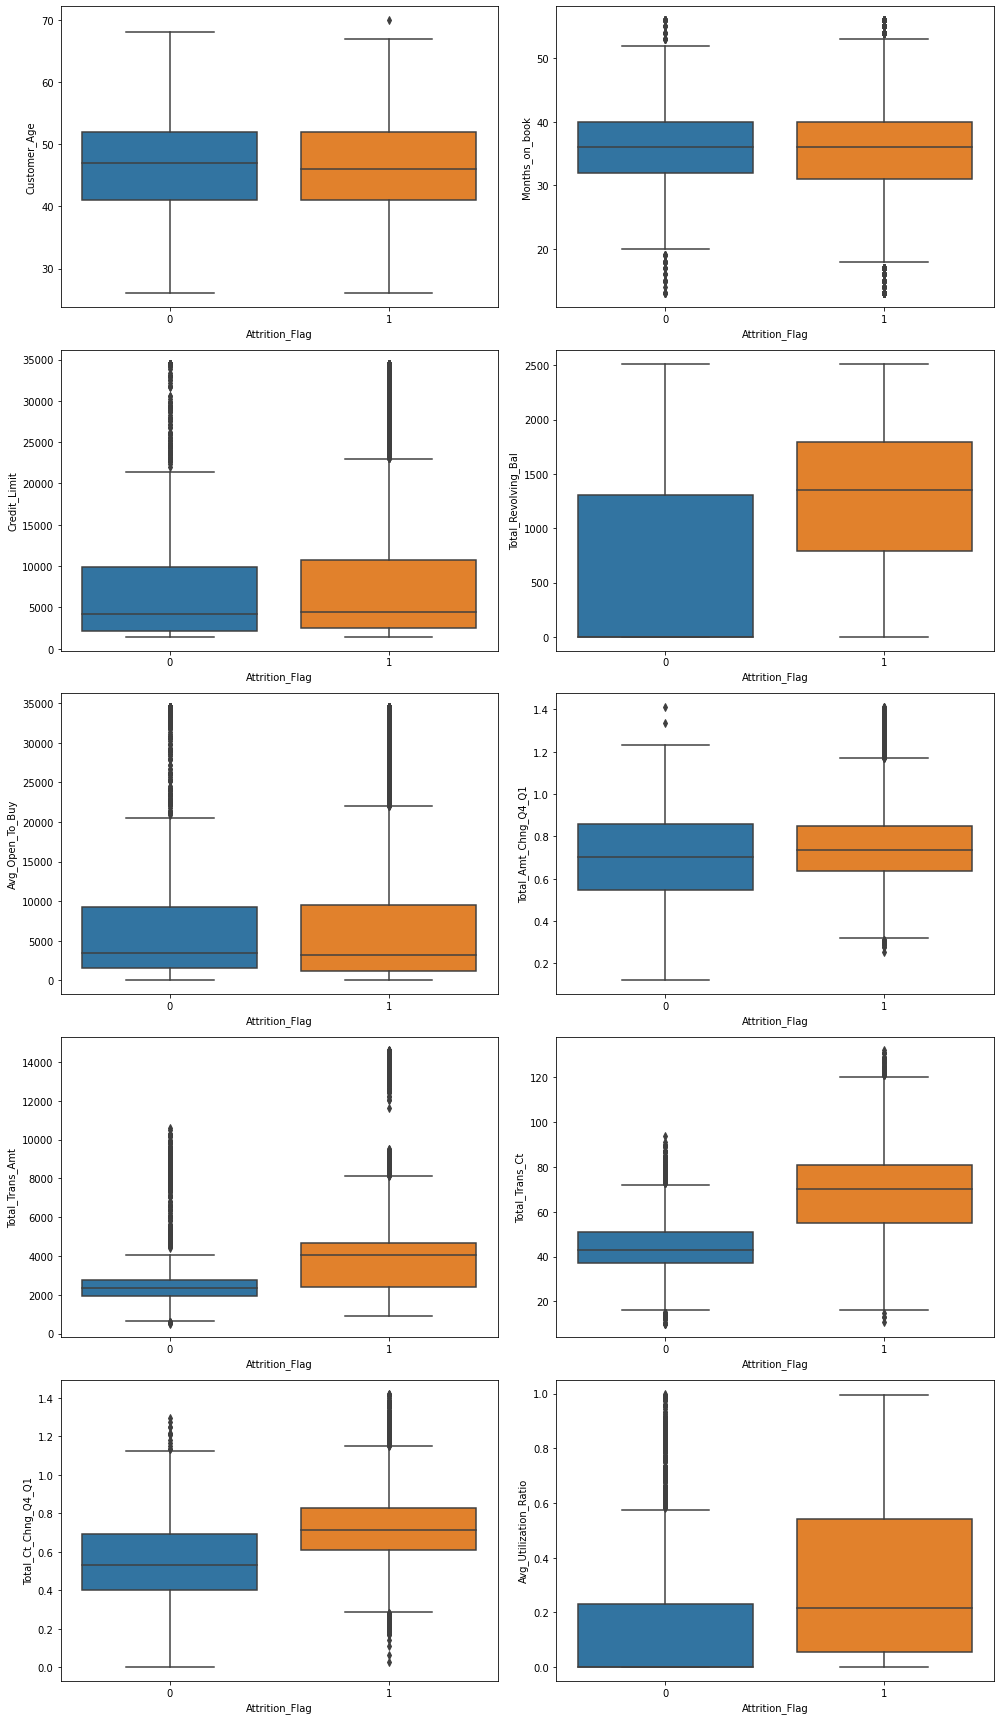

In [19]:
fig, axes = plt.subplots(5,2, figsize=(14,24))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(numerical_columns):
    plot = sns.boxplot(data=data_after_removing_outliers, y=col, x='Attrition_Flag', ax=axes[i])
plt.tight_layout()

# Split Train and Test 

In [20]:
X = data_after_removing_outliers.drop(['Attrition_Flag'],1)
y = data_after_removing_outliers['Attrition_Flag']

In [21]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 123, stratify=y)


# Oversampling (SMOTEENN)

In [22]:
from imblearn.combine import SMOTEENN

smoteen = SMOTEENN()
X_train, y_train = smoteen.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

# Standard Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
X_train

array([[ 1.15701978, -1.14350763, -0.02982739, ..., -0.11353049,
        -0.05928222, -0.22864706],
       [ 1.15701978, -0.30948481,  1.89364304, ..., -0.11353049,
        -0.05928222, -0.22864706],
       [-0.37163644,  1.35856082, -0.44199962, ..., -0.11353049,
        -0.05928222, -0.22864706],
       ...,
       [ 0.0452698 ,  0.524538  ,  0.79451708, ..., -0.11353049,
        -0.05928222, -0.22864706],
       [ 0.32320729, -1.14350763,  0.38234485, ..., -0.11353049,
        -0.05928222, -0.22864706],
       [-1.34441767,  0.524538  , -1.54112558, ..., -0.11353049,
        -0.05928222, -0.22864706]])

# **5. Develop Model**

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
# Cross K Validation
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_auc_score, recall_score

def evaluate_model(model, X_test, y_test):
  y_pred = cross_val_predict(model, X_test, y_test, cv=5)
  cm = confusion_matrix(y_test, y_pred)
  print(cm)
  print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))
  print("Accuracy Score: ", accuracy_score(y_test, y_pred))
  print("Precision Score: ", precision_score(y_test, y_pred))
  print("Recall Score: ", recall_score(y_test, y_pred))

## **K-Nearest Neighbor**

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [29]:
evaluate_model(knn, X_test, y_test)

[[  59  263]
 [  29 1546]]
ROC AUC Score:  0.5824085576259489
Accuracy Score:  0.8460727464417501
Precision Score:  0.8546158098396904
Recall Score:  0.9815873015873016


## **Support Vector Machine**

In [30]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
evaluate_model(svm, X_test, y_test)

[[ 146  176]
 [  25 1550]]
ROC AUC Score:  0.7187715665976535
Accuracy Score:  0.8940432261465472
Precision Score:  0.8980301274623407
Recall Score:  0.9841269841269841


## **Logistic Regression**

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
evaluate_model(lr, X_test, y_test)

[[ 181  141]
 [  60 1515]]
ROC AUC Score:  0.762008281573499
Accuracy Score:  0.8940432261465472
Precision Score:  0.9148550724637681
Recall Score:  0.9619047619047619


## **Decision Tree**

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [35]:
evaluate_model(dt, X_test, y_test)

[[ 250   72]
 [  75 1500]]
ROC AUC Score:  0.8643892339544513
Accuracy Score:  0.922509225092251
Precision Score:  0.9541984732824428
Recall Score:  0.9523809523809523


## **Random Forest**

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
evaluate_model(rf, X_test, y_test)

[[ 216  106]
 [  25 1550]]
ROC AUC Score:  0.8274672187715666
Accuracy Score:  0.9309435951502372
Precision Score:  0.9359903381642513
Recall Score:  0.9841269841269841


## **XG Boost**

In [38]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [39]:
evaluate_model(xgb, X_test, y_test)

[[ 265   57]
 [  25 1550]]
ROC AUC Score:  0.9035541752933057
Accuracy Score:  0.9567738534528203
Precision Score:  0.9645301804604853
Recall Score:  0.9841269841269841


## **Light GBM**

In [40]:
import lightgbm as lgb

gbm = lgb.LGBMClassifier()
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [41]:
evaluate_model(gbm, X_test, y_test)

[[ 271   51]
 [  24 1551]]
ROC AUC Score:  0.9131884057971014
Accuracy Score:  0.9604638903531892
Precision Score:  0.9681647940074907
Recall Score:  0.9847619047619047


# **Hyperparameter Tuning for Light GBM**

In [42]:
params = {
    'max_depth':[3,7,9,'max'],
    'n_estimators': [150, 200, 250],
    'num_leaves': [25, 35, 40],
    'learning_rate': [0.01, 0.22, 0.3]
    }

In [43]:
gbm_grid = lgb.LGBMClassifier()

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
             estimator=gbm_grid,
             param_grid=params,
             scoring = 'roc_auc',
             n_jobs = -1,
             cv = 3,
             verbose=2
            )

In [44]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  3.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.22, 0.3],
                         'max_depth

In [45]:
grid.best_params_

{'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 150, 'num_leaves': 25}

In [50]:
import lightgbm as lgb

gbm_after_tuning = lgb.LGBMClassifier(learning_rate=0.3, max_depth=7, n_estimators=150, num_leaves=35)
gbm_after_tuning.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.3, max_depth=7,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=150, n_jobs=-1, num_leaves=35, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [51]:
evaluate_model(gbm_after_tuning, X_test, y_test)

[[ 273   49]
 [  28 1547]]
ROC AUC Score:  0.9150241545893719
Accuracy Score:  0.959409594095941
Precision Score:  0.9692982456140351
Recall Score:  0.9822222222222222


# **Hyperparameter Tuning For XG Boost**

In [52]:
params_XGB = {
    'eta':[0.1, 0.3, 0.5],
    'max_depth': [5, 6, 7],
    'gamma': [0, 1, 5]
    }

In [53]:
xgb_grid = XGBClassifier()

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
             estimator=xgb_grid,
             param_grid=params_XGB,
             scoring = 'roc_auc',
             n_jobs = -1,
             cv = 3,
             verbose=2
            )

In [54]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   58.3s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  2.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'eta': [0.1, 0.3, 0.5], 'gamma': [0, 1, 5],
                         'max_depth': [5, 6, 7]},
             pre_dispatch='2*n_jobs', refit=True, return_tra

In [56]:
grid.best_params_

{'eta': 0.1, 'gamma': 0, 'max_depth': 5}

In [57]:
from xgboost import XGBClassifier

xgb_after_tuning = XGBClassifier(eta= 0.1, gamma= 0, max_depth= 5)
xgb_after_tuning.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [58]:
evaluate_model(xgb_after_tuning, X_test, y_test)

[[ 274   48]
 [  32 1543]]
ROC AUC Score:  0.9153071083505865
Accuracy Score:  0.9578281497100686
Precision Score:  0.9698302954116907
Recall Score:  0.9796825396825397


# **Evaluation**

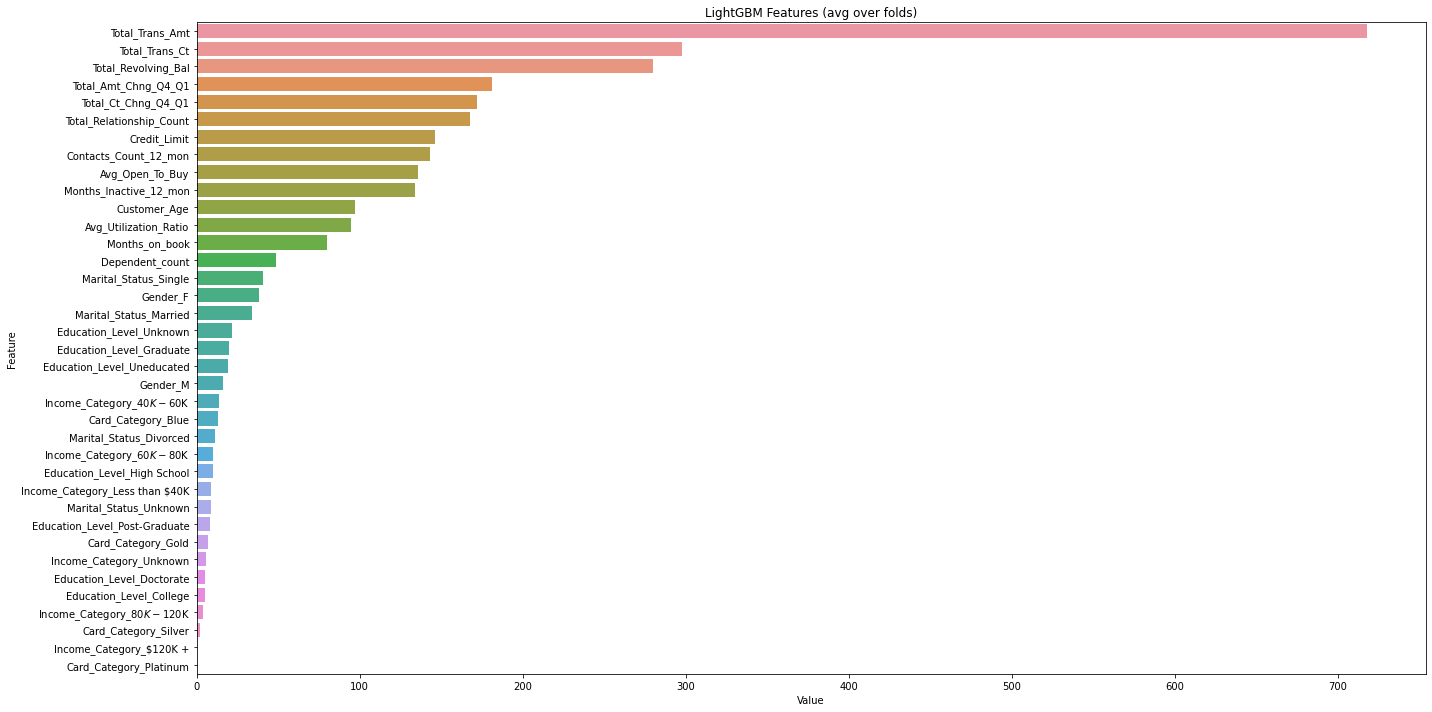

<Figure size 432x288 with 0 Axes>

In [59]:
# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(gbm.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')